In [9]:
import scipy as sc, scipy.io
import numpy as np
import matplotlib.cm as cm
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib.colors import LightSource

from matplotlib import colors
from matplotlib import ticker

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_idealized
import functions_grid
import functions_realistic
import functions_plot

import netCDF4 as nc
from netCDF4 import Dataset

(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

In [10]:
def def_regionS(xl=-1600e3, xr=-1300e3, yb=1500e3, yt=1780e3):
    ''' Returns an extract of the complete IBCAO bathymetric
    grid using xl, xr, yb, and yt, which correpond to the left,
    right, bottom, and top boundaries when plotted.
    '''

    ibcao_file = scipy.io.netcdf_file('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/data/IBCAO_V3_500m_RR.grd')
    x = ibcao_file.variables['x'][:]
    y = ibcao_file.variables['y'][:]
    z = ibcao_file.variables['z'][:]
    xmin = np.where(x==xl)[0][0]
    xmax = np.where(x==xr)[0][0]
    ymin = np.where(y==yb)[0][0]
    ymax = np.where(y==yt)[0][0]
    x_region = x[xmin:xmax]
    y_region = y[ymin:ymax]
    z_region = z[ymin:ymax, xmin:xmax]
    return x_region, y_region, z_region

x_region, y_region, z_region = def_regionS()

In [11]:
vmin, vmax = z_region.max(), z_region.min()

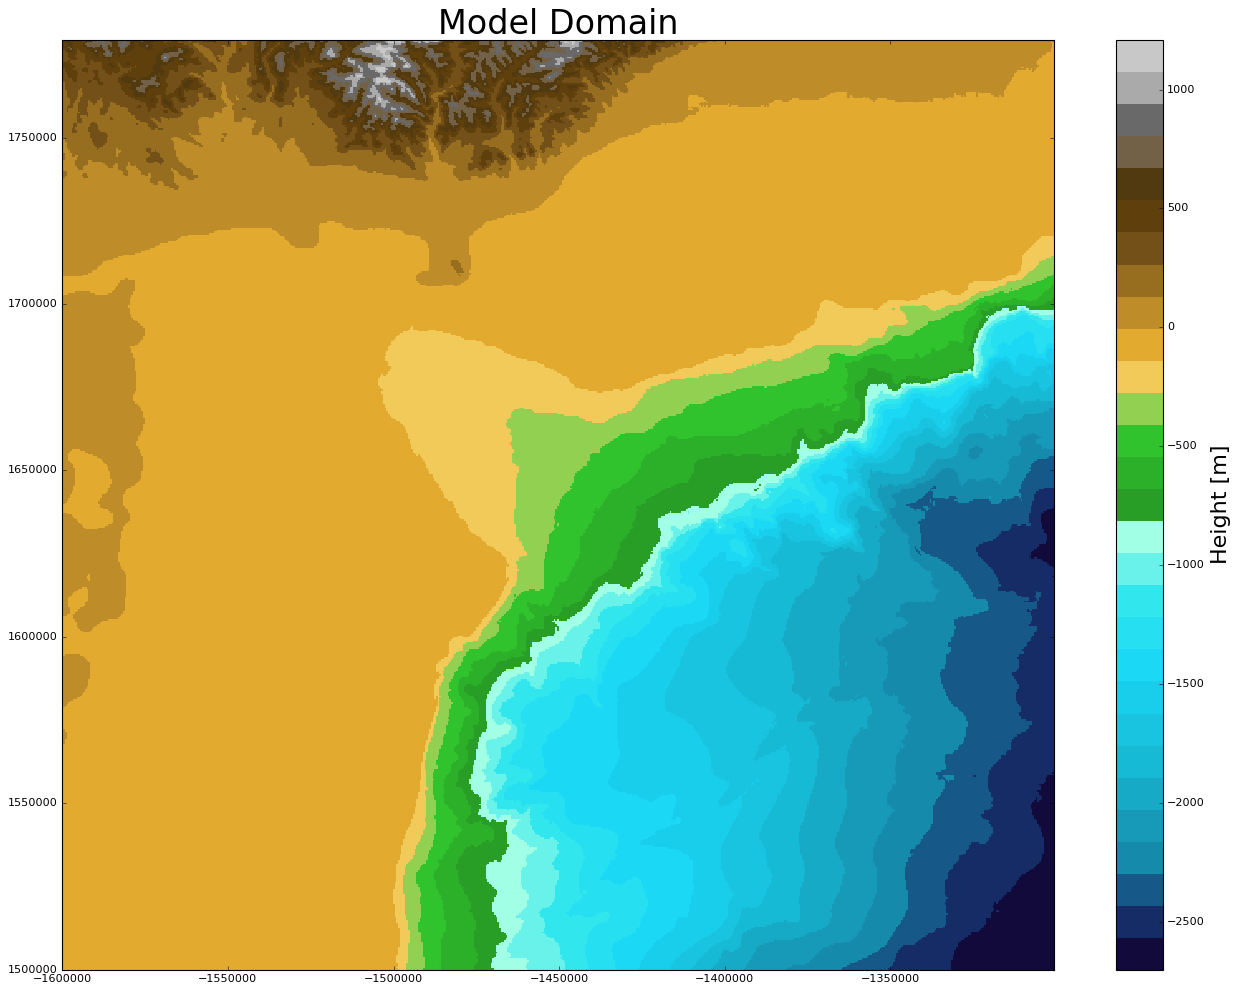

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15)); ax.grid()
p = ax.pcolormesh(x_region, y_region, z_region, cmap=cmapmc)
ax.set_xlim([x_region.min(), x_region.max()])
ax.set_ylim([y_region.min(), y_region.max()])
ax.set_title('Model Domain', fontsize=30)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Height [m]', fontsize=20)

In [13]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        (vmin,), _ = self.process_value(self.vmin)
        (vmax,), _ = self.process_value(self.vmax)
        resdat = np.asarray(result.data)
        result = np.ma.array(resdat, mask=result.mask, copy=False)
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        res = np.interp(result, x, y)
        result = np.ma.array(res, mask=result.mask, copy=False)
        if is_scalar:
            result = result[0]
        return result

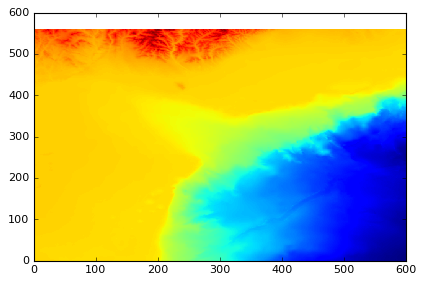

In [14]:
xs, ys, real = x_region, y_region, z_region
plt.pcolormesh(z_region)

X, Y = np.meshgrid(xs, ys)
cmap, norm = cmapmc, MidpointNormalize(vmin=-1500, vmax=1500, midpoint=-450.0)
#fig = plt.figure(figsize=(20, 15))
#ax = fig.gca(projection='3d')
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(270, 45)
rgb = ls.shade(real, cmap=cmap, vert_exag=0.1, blend_mode='soft')
s = ax.plot_surface(X, Y, real, rstride=1, cstride=1, cmap=cmap, facecolors=rgb, 
                    linewidth=0, antialiased=False, shade=False, norm=norm, alpha=1)
#cset = ax.contourf(X, Y, real, zdir='z', offset=1300, cmap=cmapmc_r)
#cset = ax.contourf(X, Y, real, zdir='y', offset=0, cmap=cm.gist_earth_r)
#cset = ax.contourf(X, Y, real, zdir='z', offset=-2500, cmap=cmap, norm=norm)
ax.set_zlim(-2500, 1500)
ax.view_init(elev=30, azim=350)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_zticks([])
#fig.colorbar(s, ax=ax)

In [15]:
X, Y = np.meshgrid(xs, ys)

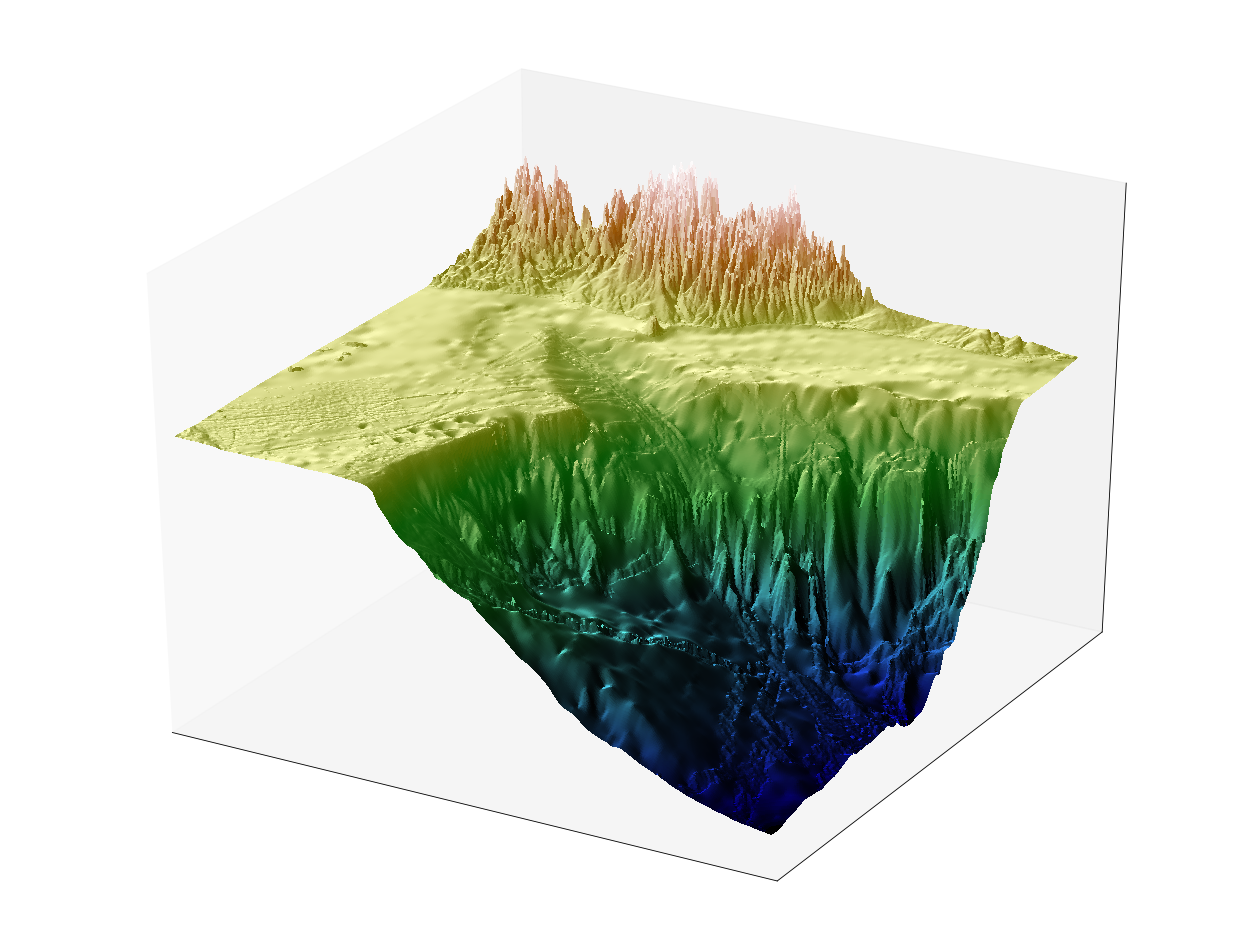

In [16]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(20, 15))
#ax.text(-1400000, 1750000, 750, 'coast', None, fontsize=30)
#ax.text(-1450000, 1700000, -150, 'canyon', None, fontsize=30)
#ax.text(-1330000, 1750000, -2500, 'deep\nocean', None, fontsize=30)
ls = LightSource(270, 45)
rgb = ls.shade(real, cmap=cm.gist_earth, vert_exag=0.8, blend_mode='overlay')
surf = ax.plot_surface(X, Y, real, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.view_init(elev=30)

fig.savefig('Mackenzie_Bathymetry.png', dpi=200)